In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

X.shape, data.feature_names

((569, 30),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [42]:
# Centroid based clustering (K-Means)
km = KMeans(n_clusters=2, )
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_

metrics.accuracy_score(labels, y)

0.8541300527240774

In [6]:
pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

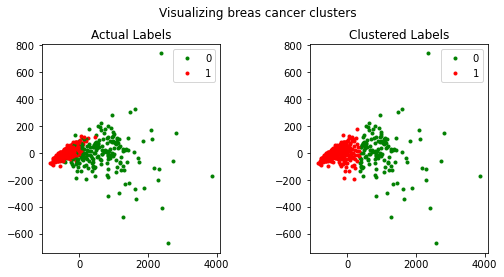

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Visualizing breas cancer clusters")
fig.subplots_adjust(top=.85, wspace=.5)
ax1.set_title("Actual Labels")
ax2.set_title("Clustered Labels")

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c="g", marker=".")
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c="r", marker=".")
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i, 0], bc_pca[i, 1], c="g", marker=".")
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i, 0], bc_pca[i, 1], c="r", marker=".")

l1 = ax1.legend([c1, c2], ["0", "1"])
l2 = ax2.legend([c3, c4], ["0", "1"])

In [9]:
from sklearn import metrics
metrics.accuracy_score(labels, y)

0.8541300527240774

In [13]:
# Hierarchical-Based Clustering
Z = linkage(X, "ward")
Z

array([[  287.        ,   336.        ,     3.81596727,     2.        ],
       [  106.        ,   420.        ,     4.11664267,     2.        ],
       [   55.        ,   251.        ,     4.93361024,     2.        ],
       ...,
       [ 1130.        ,  1132.        ,  6196.07482529,    86.        ],
       [ 1131.        ,  1133.        ,  8368.99225244,   483.        ],
       [ 1134.        ,  1135.        , 18371.10293626,   569.        ]])

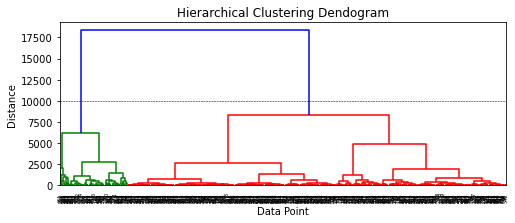

In [14]:
plt.figure(figsize=(8, 3))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
dendrogram(Z)
plt.axhline(y=10000, c="k", ls="--", lw=.5)
plt.show()

In [15]:
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion="distance")
hc_labels

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [17]:
metrics.accuracy_score([0 if x == 1 else 1 for x in hc_labels], y)

0.7785588752196837